
#  Final Review Session

## Fahrenheit-to-Celsius Converter
1. Write a program that displays a temperature conversion table for degrees Celsius and degrees Fahrenheit. The table should include rows for all temperatures between 0 and 100 degrees Celsius that are multiples of 10 degrees Celsius. Include appropriate headings on your columns. The formula for converting between degrees Celsius and degrees Fahrenheit is as follows.<br><br>
$T(\deg F) = T(\deg C) * 1.8 +32 $ <br><br>

In [9]:
#import required packages

import numpy as np
import pandas as pd

#create your dataframe

temperature = pd.DataFrame({'Celsius':np.arange(0,110,10)}) #creates temperature dataframe with one Celsius column
temperature['Fahrenheit']=temperature['Celsius'] * 1.8 + 32 #creates a Fahrenheit column using the given equation
#print(temperature)

,Celsius,Fahrenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0
6,60,140.0
7,70,158.0
8,80,176.0
9,90,194.0


## Visualization of Volve Production Data
2. Write a Python code that will load the Volve daily production data from the attached "Volve production data.xlsx" file. This is stored in the first tab of the Excel sheet. <br>
    * Open the Excel sheet with Microsoft Excel and observe that Column D contains the well names; Columns J and K contain the average bottomhole pressure and temperature, respectively; Column R contains the choke sizes; Columns S, T and U contain the daily oil, gas and water production rates, respectively; Column V contains the daily water injection rates; while Column W tells you whether the well is a production well or an injection well. 
3. Write a Python code that will create a database called "VolveProduction.db".
4. Store all of the data loaded from "Volve production data.xlsx" into a Database table named "DailyRates".
5. Query the DailyRates table and store the choke sizes for the wells using wellbore codes "7078" into a dataframe named "testWellDF"
6. Plot choke size data on the secondary axis and oil rate on the primary axis for each of the production wells in the Volve data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3 


#2. Import Volve daily production data
fileName = 'Volve production data.xlsx'
xl = pd.ExcelFile(fileName)
dailyDF = xl.parse('Daily Production Data')

#3. Create VolveProduction database
conn = sqlite3.connect("VolveProduction.db") 
cur = conn.cursor()

#4. Store imported data in Database table named "DailyRates"
dailyDF.to_sql("DailyRates", conn, if_exists="append", index = False)

#5. Query the DailyRates table and store the choke sizes and oil rates for Volve production wells

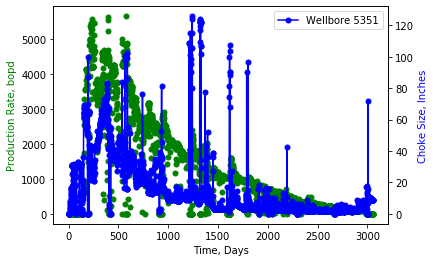

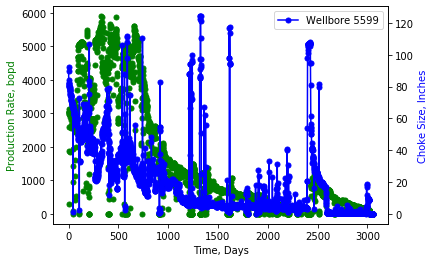

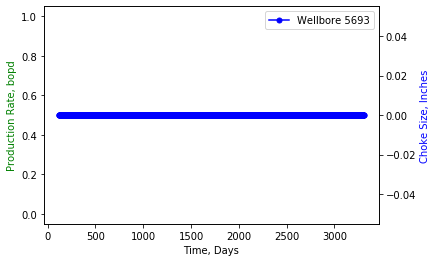

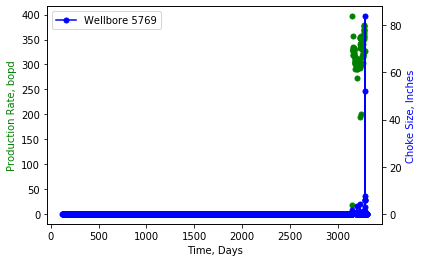

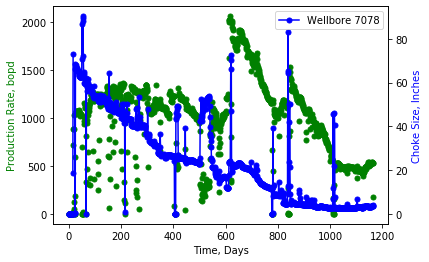

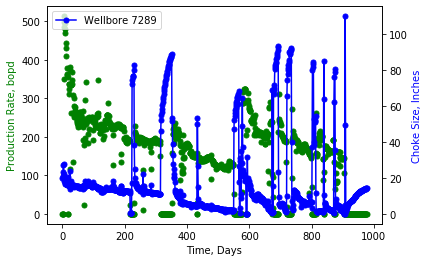

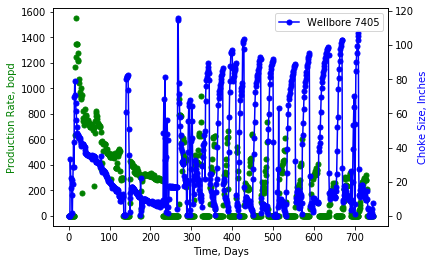

In [33]:
#dailyDF.head()
wellbore = [5351,5599,5693,5769,7078,7289,7405] #use excel filter to get wellbore IDs

for i in wellbore:
    
    testWellDF = pd.read_sql_query(f"SELECT DP_CHOKE_SIZE,BORE_OIL_VOL FROM DailyRates WHERE NPD_WELL_BORE_CODE={i};", conn) 
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot( testWellDF['BORE_OIL_VOL'], color="green", ls='None', marker='o', markersize=5,)
    ax2.plot( testWellDF['DP_CHOKE_SIZE'], color="blue", ls='solid', marker='o', markersize=5,label='Wellbore '+str(i))
    ax1.set_xlabel('Time, Days')
    ax1.set_ylabel('Production Rate, bopd', color='g')
    ax2.set_ylabel('Choke Size, Inches', color='b')
    plt.legend()
    
    plt.show()

